# Python Help Session

## Looking back at the basics...

We want to always have some kind of pipeline or workflow that involves the minimum processes that we have to go through to write our notebook.

For any data exploration notebook you will want to do following these steps:

1. Import Libraries and Packages

2. Load Data

3. Inspect the Data 

4. First Exploration of the Data

5. Clean the Data

6. Feature Engineering

7. Data Visualisation - second exploration of the data

8. Do we have any more questions...? <font color='blue'>Usually, one would loop back through steps 4-7 as new questions and information arise.</font>

## 1. Import Libraries and Packages

Import any libraries that you may need to use. Note that libraries can be imported at any time **BEFORE** they are required - they do not have to be imported at the start unless the first few cells will utilise them.

In [1]:
# Import libraries / packages
import numpy as np                    # NumPy works with numerical data - Arrays
import pandas as pd                   # Pandas works with tabular data - DataFrame and Series

In [2]:
# Data visualisation libraries - commonly used
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load data

There are multiple ways to do this and they depend on whether data is stored locally or scrapped from the web. Also remember to specify how the file will be read, i.e. comma-separated, tab-separated, semi-colon-separated, etc. We will go through some here...

*df = dataframe* (insert your own name, in this notebook I use `data`)

In [3]:
# Load data (for our notebook example)
dataset_location = 'https://raw.githubusercontent.com/gerberl/6g7v0026-2122/main/datasets/titanic-kaggle/titanic.csv'
data = pd.read_csv(dataset_location)

In [4]:
# Generic examples
# set dataset location 
'''
dataset_location = "file path/filename.csv" # stored on a local file path - remember on Windows system to change from '\' to '/'
dataset_location = "web address.csv"
'''

# name and load data 
'''df = pd.read_csv(dataset_location)'''

# if it's not a .csv file then specify the separator
'''
df = pd.read_csv(dataset_location, sep='\t') # tab-separated
df = pd.read_csv(dataset_location, sep=';') # semi-colon-separated
'''

"\ndf = pd.read_csv(dataset_location, sep='\t') # tab-separated\ndf = pd.read_csv(dataset_location, sep=';') # semi-colon-separated\n"

In [5]:
# For Google Colab users...

# Upload data file from a local file repository
'''
from google.colab import files
# upload file into Colab session folder
df = files.upload()
'''

# Upload from Google Drive mounted to PC
'''
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive/MyDrive/Colab')\n"

## 3. Inspect the data

Again, there are multiple ways to do this but it's important to get a sense of what the data is (shape, types, etc.) so that one can clean the data and frame research and data science questions for data exploration.

#### Inspect data

* **df.head()**         &emsp;<font color='green'># returns top n (5 by default, up to 60) rows of a data frame or series</font>
* **df.tail()**         &emsp;<font color='green'># returns bottom n (5 by default, up to 60) rows of a data frame or series</font>
* **df.sample()**       &emsp;<font color='green'># returns a random sample (default is 1) of the list without repeats</font>

#### Summarise data

* **df.info()**        &emsp;<font color='green'># returns a concise summary of the DataFrame</font>
* **df.describe()**    &emsp;<font color='green'># computes a summary of statistics relating to the DataFrame columns</font>

#### Descriptive statistics

* **df.count()**          &emsp;<font color='green'># returns number of non-null observations</font>
* **df.sum()**            &emsp;<font color='green'># returns sum of values</font>
* **df.mean()**           &emsp;<font color='green'># returns mean of values</font>
* **df.median()**         &emsp;<font color='green'># returns median of values</font>
* **df.mode()**           &emsp;<font color='green'># returns mode of values</font>
* **df.std()**            &emsp;<font color='green'># returns standard deviation of the values</font>
* **df.min()**            &emsp;<font color='green'># returns minimum value</font>
* **df.max()**            &emsp;<font color='green'># returns maximum value</font>
<p>
* **df['ColumnName'].value_counts()**  &emsp;<font color='green'># computes a Series containing counts of non-null values only on specified column</font></p>

-> Remember that the default for `.head()` and `.tail()` are 5 rows and for `.sample()` it's 1 row

In [6]:
# first one that we usually look at is .head(), .tail(), or .sample()
data.head()
#data.tail()
#data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-> We need to use `inplace=True` to overwrite the DF

In [7]:
# Set index
#data = data.set_index('PassengerId')
data.set_index('PassengerId', inplace = True)
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


-> `.shape` helps us keep track of the volume of data dropped during cleaning 

-> Deleting 800 rows in this DF would be bad (~90% of the data), in a DF with 100,000 rows 800 would only be 0.8% of the data.

In [8]:
# shape tells us how many columns and how many rows in the DF
data.shape

(891, 11)

In [9]:
# use if we want to know just the names of the columns (features)
#data.columns
data.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

-> Provides the number of rows, number of columns, names of each column alongside their data type, 
how many of each dtype we have, gives us info about any null values (important for data cleaning)

In [10]:
# .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


-> Breaks down info into columns where dtype = integer or float, NOT object,
gives number of rows, mean, std deviation, min, max, IQR

In [11]:
# describe whole DF or specific columns - data distributions
data.describe().round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [12]:
data['Age'].describe().round(2)

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

-> We need to decide do we want to drop rows, drop columns, or impute data when we have null values?

In [13]:
# Null values 
#data.isna()
#data.notna().sum()
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4. First Exploration of the Data
This somewhat comes under inspection but it goes a little deeper - you're diving into the data and starting to form those research questions and to see where the data needs cleaning. It's also where things diverge - it's your own take on the data from here...

**Frame a question:** What is it you want to know about the dataset? What questions do you want to be answered? At this point, think laterally / creatively about the data...

We can run searches or queries on the data to find out more or subset and group data...

In [14]:
# use .query() if searching on an integer* or float
data.query('Age<15') # returns the rows and number of rows in selected feature where conditions are met

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S


In [15]:
# use .loc[] for searching on any datatype 
data.loc[data['Sex']=='male']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


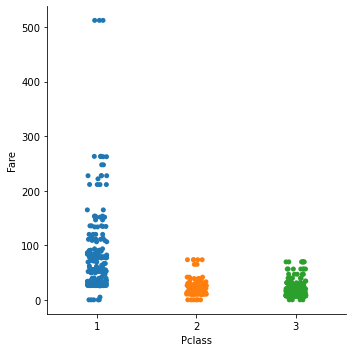

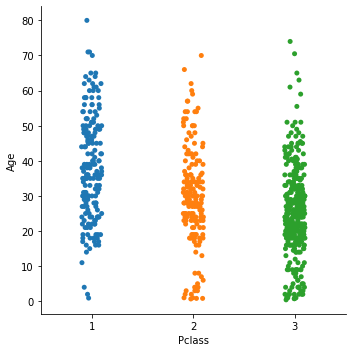

In [16]:
sns.catplot(data=data, x='Pclass', y='Fare')
sns.catplot(data=data, x='Pclass', y='Age');

### `Cabin`

Question: Is there a correlation between `Cabin` and survival?

In [17]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
data.loc[data['Cabin']=='C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


In [19]:
data.loc[data['Cabin']=='F33']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0,F33,S
517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


In [20]:
data.loc[data['Cabin']=='G6']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S


https://images.liverpoolmuseums.org.uk/2020-01/titanic-deck-plan-for-titanic-resource-pack-pdf.pdf

In [21]:
data2 = data.dropna(how='any') # just need to drop all NaN because str.contains can't deal with it
data2.loc[ data2['Cabin'].str.contains('E') ].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C


In [22]:
data2.loc[(data2['Cabin'].str.contains('E')) & ((data2['Pclass']==2) | (data2['Pclass']==3))].sample(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.000,E101,S
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.475,E121,S
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.050,E10,S
718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.500,E101,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.475,E121,S
773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.500,E77,S


### Grouping Data

In [52]:
data['age_group'] = pd.cut(
    data['Age'],
    bins=range(10, 101, 10),
    right=False,
    labels=[f'{age_start}~{age_start + 9}'
            for age_start in range(10, 100, 10)]
)

In [53]:
data['age_group'].cat.categories

Index(['10~19', '20~29', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89',
       '90~99'],
      dtype='object')

In [54]:
data[['Age', 'age_group']].tail(10)

,Age,age_group
PassengerId,,
882,33,30~39
883,22,20~29
884,28,20~29
885,25,20~29
886,39,30~39
887,27,20~29
888,19,10~19
889,29,20~29
890,26,20~29


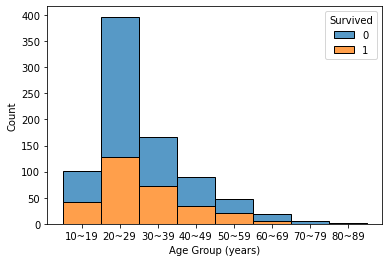

In [66]:
sns.histplot(data=data, x='age_group', hue='Survived', multiple='stack')
# customise
plt.gca().set(xlabel="Age Group (years)");

## 5. Clean the data

There's lots of different ways to clean the data that depends on the dataset, but here we drop columns, drop rows, impute data, rename columns, change data type, etc.

I'm going through a **non-exhaustive** set of examples...

In [23]:
print(data['Pclass'].nunique())
print(data['Pclass'].isnull().sum())

3
0


In [24]:
# Show the count of missing values (NaN) for each column and the number of unique entries
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls'])

for i, var in enumerate(data.columns):
    variables.loc[i] = [var, data[var].nunique(), data[var].isnull().sum()]

variables

,Variable,Number of unique values,Number of nulls
0,Survived,2,0
1,Pclass,3,0
2,Name,891,0
3,Sex,2,0
4,Age,88,177
5,SibSp,7,0
6,Parch,7,0
7,Ticket,681,0
8,Fare,248,0
9,Cabin,147,687


In [25]:
# Display unique values in any column using f-strings

for column in data.columns:
  n_unique = data[column].nunique()
  if data[column].nunique() <= 88:                                # number of unique ages is the largest manageble number of unique entries
    print(f'{column} ({n_unique}): {data[column].unique()}\n')
  else:
    print(f'{column} ({n_unique})\n')

Survived (2): [0 1]

Pclass (3): [3 1 2]

Name (891)

Sex (2): ['male' 'female']

Age (88): [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

SibSp (7): [1 0 3 4 2 5 8]

Parch (7): [0 1 2 5 3 4 6]

Ticket (681)

Fare (248)

Cabin (147)

Embarked (3): ['S' 'C' 'Q' nan]



There are numerous ways to handle missing data and these are dependent on the data type. The 3 most common are as follows:

1.   **Drop missing values** | in the case that there are variables containing few missing values this would be a good option; but it is important to note that dropping those values will drop the entire row, including the good data that is stored on other variables within that row. 

2.   **Impute with the mean or median** | replacing missing values with the mean for the variable in a numerical column is another option if there are not many outliers in the variable. If there are many outliers, it may be advisable to impute with the median value.

3.   **Impute with the mode** | if the variable is categorical, missing values can be replaced with the most frequent value.

In [26]:
# Impute mean
data['Age'].fillna((data['Age'].mean()), inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [28]:
# Change data type
data['Age'] = data['Age'].astype(int)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [30]:
# drop columns
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [31]:
data.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
# rename column headers
data.rename(columns={'Sex': 'Gender'}, inplace=True)
data.keys()

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
# Tidy names - uppercase
data['Gender'] = data.Gender.apply(lambda x: x.upper())      
data.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,MALE,22,1,0,7.2500,S
2,1,1,FEMALE,38,1,0,71.2833,C
3,1,3,FEMALE,26,0,0,7.9250,S


In [34]:
# Tidy names - lowercase
data['Gender'] = data.Gender.apply(lambda x: x.lower())      
data.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S


In [35]:
data.replace(to_replace = 'male', value ='m', inplace=True)
data.replace(to_replace = 'female', value ='f', inplace=True)
data.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,m,22,1,0,7.2500,S
2,1,1,f,38,1,0,71.2833,C
3,1,3,f,26,0,0,7.9250,S


### 6. Feature Engineering

Question: Did passengers travelling alone have a better chance of survival?

**Why do we want to know if a passenger is travelling alone?**

Consider this...if a passenger is travelling with a loved one it probably doesn't matter too much if it's their spouse or child, they wouldn't have wanted to be separated from either. This means that passengers travelling with any family would've been slower getting to the lifeboats. Passengers travelling alone would have only been looking out for themselves. 

Does this make it more likely that they will survive? Run the queries to find out and then plot them up!

* How many passengers travelling alone were female? - females were more likely to be admitted onto the lifeboats than males, regardless of class

* What was the class of passengers travelling alone?

This is where one can get very creative! How can we create new features from the existing data - either in addition or to combine features to reduce dimensionality (and therefore increase explainability - i.e. make the data, and hence the ML models, simpler)?

In [36]:
# create user-defined function

def travel_alone(SibSp, Parch):
   
    if SibSp==0 and Parch==0:                                                            
        return 1
    elif SibSp>=1 or Parch>=1:                                                                                
        return 0
    
# Apply condition to new column
data['Alone'] = data.apply(
lambda x: travel_alone(x['SibSp'], x['Parch']),
axis=1
)

In [37]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Gender,Age,Fare,Embarked,Alone
PassengerId,,,,,,,
1,0,3,m,22,7.2500,S,0
2,1,1,f,38,71.2833,C,0
3,1,3,f,26,7.9250,S,1
4,1,1,f,35,53.1000,S,0
5,0,3,m,35,8.0500,S,1


In [38]:
# check to see that there are 891 non-null rows in the `Alone` column
data['Alone'].isna().sum()

0

In [39]:
alone_dec = data.loc[(data['Alone']==1) & (data['Survived']==0)]
alone_dec['Survived'].value_counts()

0    374
Name: Survived, dtype: int64

In [40]:
alone_sur = data.loc[(data['Alone']==1) & (data['Survived']==1)]
alone_sur['Survived'].value_counts()

1    163
Name: Survived, dtype: int64

In [41]:
fam_dec = data.loc[(data['Alone']==0) & (data['Survived']==0)]
fam_dec['Survived'].value_counts()

0    175
Name: Survived, dtype: int64

In [42]:
fam_sur = data.loc[(data['Alone']==0) & (data['Survived']==1)]
fam_sur['Survived'].value_counts()

1    179
Name: Survived, dtype: int64

In [43]:
# should add up to 891
374+163+175+179

891

### 7. Data Visualisation - Second Exploration of the Data

Present the data visually - people can rarely understand reams of data. It is important to be able to show a visual representation of the answer to a question.

### Matplotlib plot types:
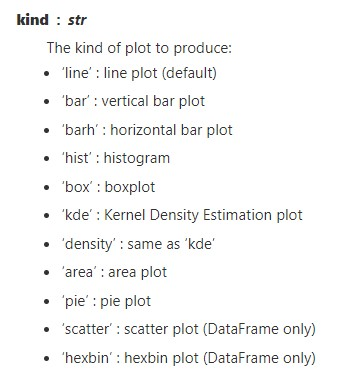

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Seaborn plot types:
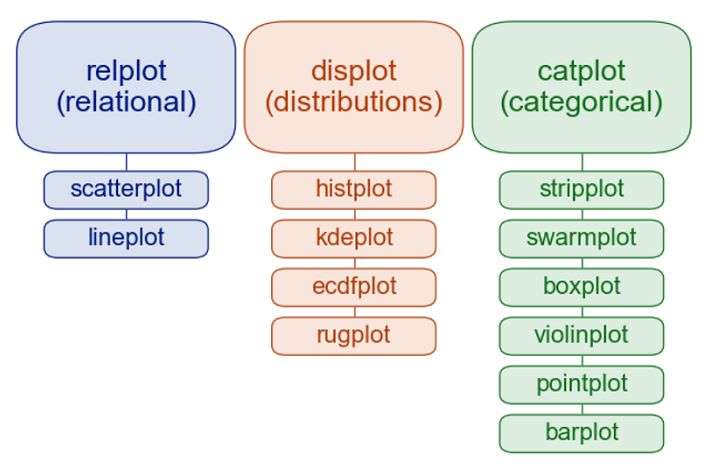

Source: https://seaborn.pydata.org/tutorial/function_overview.html

### `Pclass`, `Embarked`, `Fare`

Question: Did passengers pay more to travel from Southampton, Cherbourg or Queenstown?

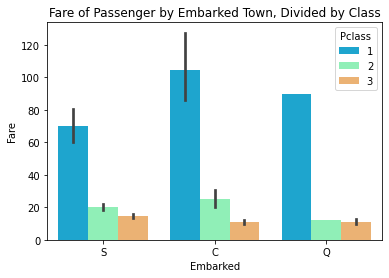

In [44]:
sns.barplot(x='Embarked',y='Fare',data=data, palette='rainbow', hue='Pclass')
plt.title("Fare of Passenger by Embarked Town, Divided by Class");

### `Gender`, `Pclass`, `Survived`
Question: Did gender affect chances of survival, and was this different in each passenger class?

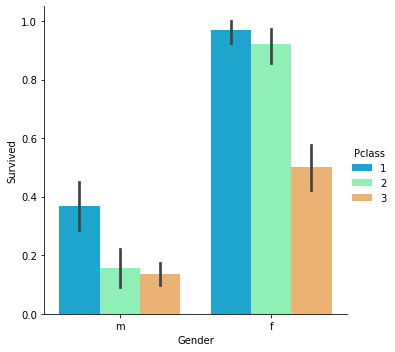

In [45]:
sns.catplot(data=data, x="Gender", y="Survived", hue="Pclass", kind="bar", palette="rainbow");

### `Alone`, `Pclass`, `Survived`
Question: Were passengers travelling alone more likely to survive, and was this different in each passenger class?

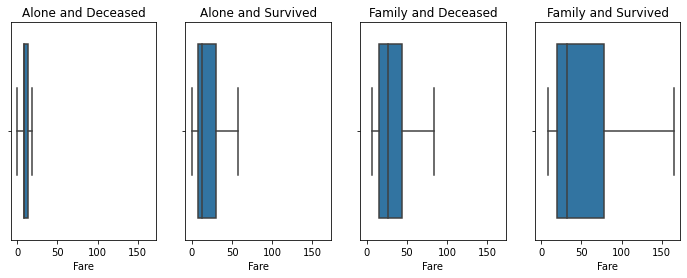

In [46]:
fig, axs = plt.subplots(1, 4, figsize=(12,4), sharex=True)

sns.boxplot(data=alone_dec, x='Fare', ax=axs[0], showfliers=False)
sns.boxplot(data=alone_sur, x='Fare', ax=axs[1], showfliers=False)
sns.boxplot(data=fam_dec, x='Fare', ax=axs[2], showfliers=False)
sns.boxplot(data=fam_sur, x='Fare', ax=axs[3], showfliers=False)

# Set titles
axs[0].title.set_text('Alone and Deceased')
axs[1].title.set_text('Alone and Survived')
axs[2].title.set_text('Family and Deceased')
axs[3].title.set_text('Family and Survived');

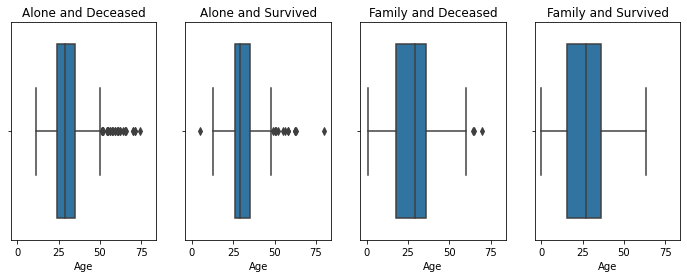

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(12,4), sharex=True)

sns.boxplot(data=alone_dec, x='Age',ax=axs[0])
sns.boxplot(data=alone_sur, x='Age',ax=axs[1])
sns.boxplot(data=fam_dec, x='Age',ax=axs[2])
sns.boxplot(data=fam_sur, x='Age',ax=axs[3])

# Set titles
axs[0].title.set_text('Alone and Deceased')
axs[1].title.set_text('Alone and Survived')
axs[2].title.set_text('Family and Deceased')
axs[3].title.set_text('Family and Survived')

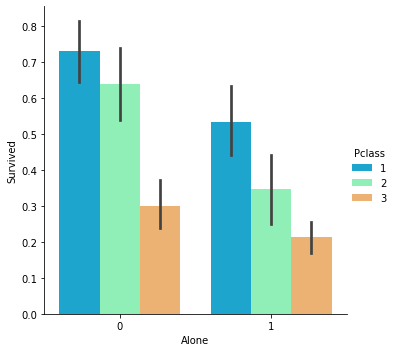

In [48]:
sns.catplot(data=data, x="Alone", y="Survived", hue="Pclass", kind="bar", palette="rainbow");

### `Age`, `Pclass`

Question: How does age vary by passenger class?

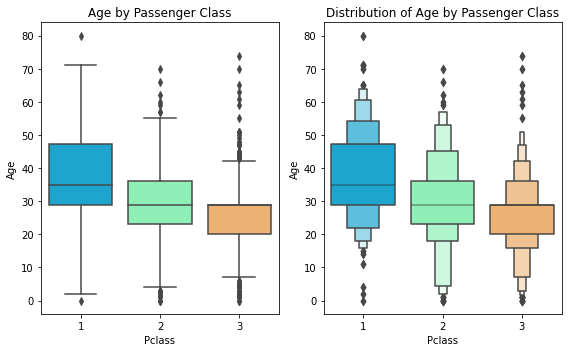

In [49]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.boxplot(x='Pclass',y='Age',data=data, palette='rainbow')
plt.title("Age by Passenger Class")

plt.subplot(1,2,2)
sns.boxenplot(x='Pclass', y='Age', data=data, palette='rainbow')
plt.title("Distribution of Age by Passenger Class")

plt.tight_layout();

### `Age`, `Pclass`, `Survived`

Question: Subset by passenger class, does age impact the likelihood of survival?

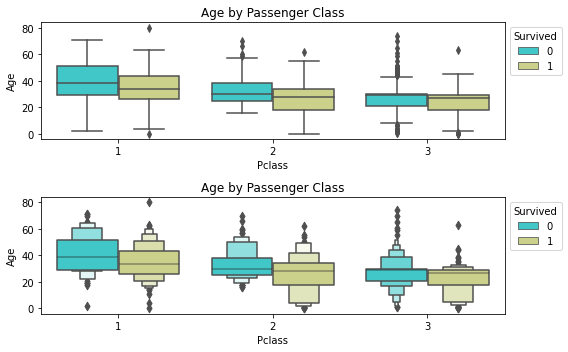

In [50]:
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax0 = sns.boxplot(x='Pclass',y='Age',data=data, palette='rainbow', hue='Survived')
sns.move_legend(ax0, "upper left", bbox_to_anchor=(1, 1))
plt.title("Age by Passenger Class")

plt.subplot(2,1,2)
ax1 = sns.boxenplot(x='Pclass',y='Age',data=data, palette='rainbow', hue='Survived')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.title("Age by Passenger Class")

plt.tight_layout();

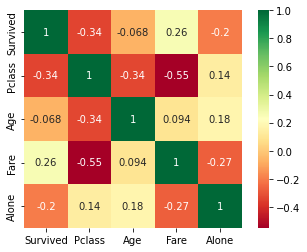

In [51]:
sns.heatmap(data.corr(), square=True, annot=True, cmap='RdYlGn');